In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

# Problem 3
The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain; Answer the questions below based on the given information; (Provide an appropriate visual representation of your answers, without which marks will be deducted)

3.1 What proportion of the gunny bags have a breaking strength less than 3.17 kg per sq cm?

In [3]:
from scipy.stats import norm

In [4]:
mean = 5
std_dev = 1.5
x = 3.17
z_score = (x - mean) / std_dev
proportion = norm.cdf(z_score)
print(proportion)

0.11123243744783456


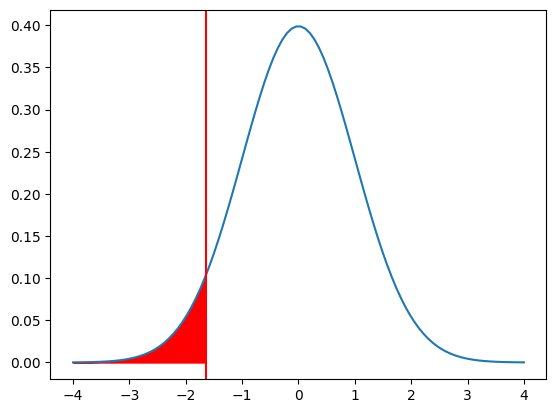

In [5]:
critical_val = norm.ppf(0.05)
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = critical_val, c = 'r')
x1 = np.linspace(-4, critical_val, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r')
plt.show()

3.2 What proportion of the gunny bags have a breaking strength at least 3.6 kg per sq. cm?

In [6]:
mean = 5
std_dev = 1.5
x = 3.6

proportion = 1 - stats.norm.cdf(x, mean, std_dev)
print(proportion)

0.8246760551477705


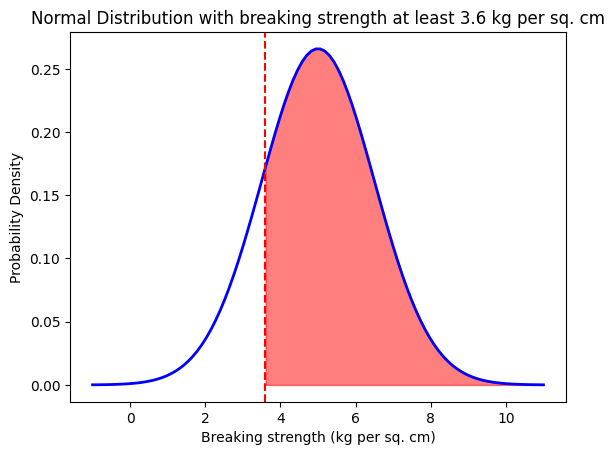

In [7]:
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)
y = stats.norm.pdf(x, mean, std_dev)

plt.plot(x, y, 'b-', linewidth=2)
plt.axvline(x=3.6, color='r', linestyle='--')
plt.fill_between(x, y, where=x>=3.6, color='red', alpha=0.5)
plt.title('Normal Distribution with breaking strength at least 3.6 kg per sq. cm')
plt.xlabel('Breaking strength (kg per sq. cm)')
plt.ylabel('Probability Density')
plt.show()

3.3	What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq. cm?

In [8]:
mean = 5
std_dev = 1.5
x1 = 5
x2 = 5.5
z1 = (x1 - 5)/1.5
z2 = (x2 - 5)/1.5
print(z1)
print(z2)

0.0
0.3333333333333333


In [9]:
area = norm.cdf(0.333) - norm.cdf(0.0)
print(area)

0.13043285842249797


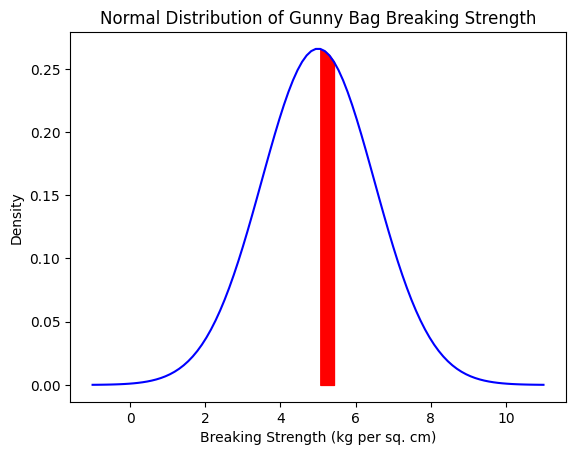

In [10]:
mean = 5
std_dev = 1.5

x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)
y = stats.norm.pdf(x, mean, std_dev)

plt.plot(x, y, color='blue')
plt.fill_between(x[(x >= 5) & (x <= 5.5)], y[(x >= 5) & (x <= 5.5)], color='r')
plt.title('Normal Distribution of Gunny Bag Breaking Strength')
plt.xlabel('Breaking Strength (kg per sq. cm)')
plt.ylabel('Density')
plt.show()

3.4	What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm?

In [11]:
mean = 5
std_dev = 1.5
p = norm.cdf(3, mean, std_dev) + (1 - norm.cdf(7.5, mean, std_dev))
print(p)


0.13900157199868257


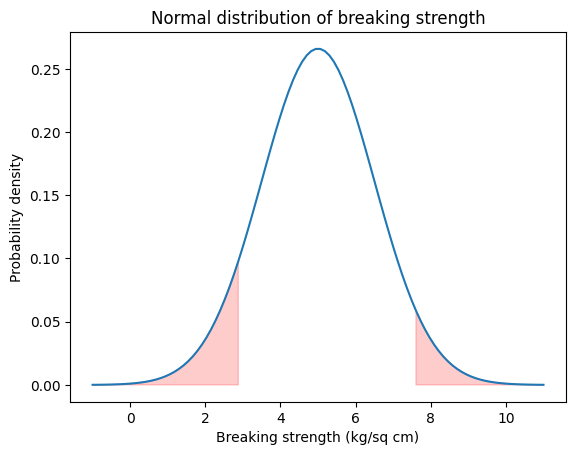

In [12]:
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)
y = norm.pdf(x, mean, std_dev)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.fill_between(x, y, where=(x < 3) | (x > 7.5), alpha=0.2, color = 'red')
ax.set_xlabel('Breaking strength (kg/sq cm)')
ax.set_ylabel('Probability density')
ax.set_title('Normal distribution of breaking strength')
plt.show()

#Problem 4
Grades of the final examination in a training course are found to be normally distributed, with a mean of 77 and a standard deviation of 8.5. Based on the given information answer the questions below

4.1 What is the probability that a randomly chosen student gets a grade below 85 on this exam?

In [13]:
mu = 77
sigma = 8.5
x = 85
p = stats.norm.cdf(x, mu, sigma)
print(p)

0.8266927837484748


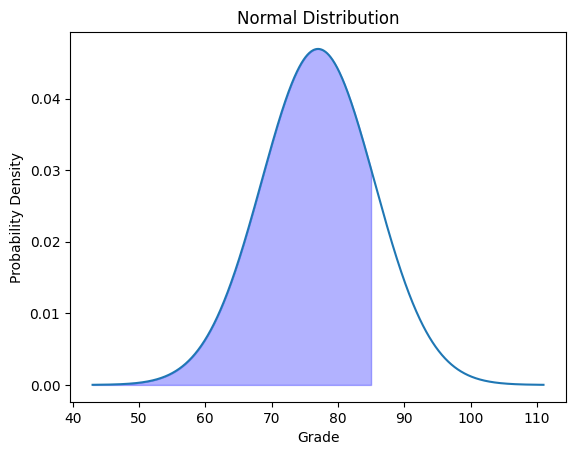

In [14]:
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y)
plt.fill_between(x, y, where=(x <= 85), color='blue', alpha=0.3)
plt.title('Normal Distribution')
plt.xlabel('Grade')
plt.ylabel('Probability Density')
plt.show()

4.2	What is the probability that a randomly selected student scores between 65 and 87

In [15]:
mu = 77
sigma = 8.5
x1 = 65
x2 = 87
z1 = (x1 - mu) / sigma
z2 = (x2 - mu) / sigma
prob_area = stats.norm.cdf(z2) - stats.norm.cdf(z1)
print(prob_area)

0.8012869336779058


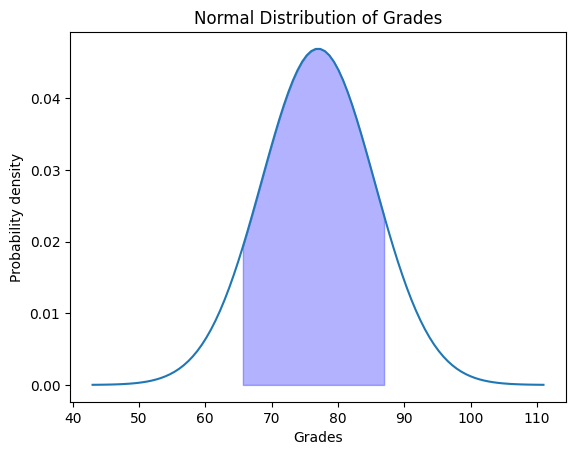

In [16]:
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y)
plt.fill_between(x, 0, y, where=((x > (mu+z1*sigma)) & (x < (mu+z2*sigma))), color='blue', alpha=0.3)
plt.xlabel('Grades')
plt.ylabel('Probability density')
plt.title('Normal Distribution of Grades')
plt.show()

4.3	What should be the passing cut-off so that 75% of the students clear the exam?

In [17]:
mu = 77
sigma = 8.5

In [18]:
pass_mark = stats.norm.ppf(0.75 , mu, sigma)
print(pass_mark)


82.7331628766667


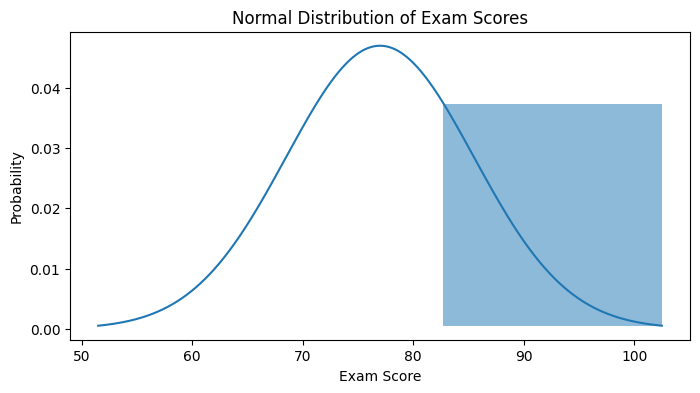

In [19]:
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y)

passing_area = stats.norm.sf(pass_mark, mu, sigma)
ax.fill_betweenx(y, pass_mark, x.max(), where=x >= pass_mark, alpha=0.5)

ax.set_xlabel('Exam Score')
ax.set_ylabel('Probability')
ax.set_title('Normal Distribution of Exam Scores')
plt.show()

#Problem 5
Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level);

5.1 Earlier experience of Zingaro with this particular client is favorable as the stone surface was found to be of adequate hardness. However, Zingaro has reason to believe now that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

In [20]:
Zing_df = pd.read_csv('/content/drive/MyDrive/Zingaro_Company.csv')

In [21]:
Zing_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Unpolished,75.0,134.110527,33.041804,48.406838,115.329753,135.597121,158.215098,200.161313
Treated and Polished,75.0,147.788117,15.587355,107.524167,138.268300,145.721322,157.373318,192.272856


In [22]:
Zing_df.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [23]:
from scipy.stats import   ttest_1samp, ttest_ind

In [24]:
t_statistic, p_value = ttest_1samp(Zing_df, 150)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: [-4.1646296  -1.22891066] p value: [8.34257399e-05 2.22998968e-01] 


5.2	Is the mean hardness of the polished and unpolished stones the same?

In [25]:
t_statistic, p_value  = ttest_ind(Zing_df['Unpolished '],Zing_df['Treated and Polished'])
print('tstat',t_statistic)    
print('P Value',p_value)

tstat -3.2422320501414053
P Value 0.0014655150194628353


In [26]:
print ("two-sample t-test p-value=", p_value)

alpha_level = 0.05

if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the Hardness of polished and unpolished stone are not equal')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that Hardness of polished and unpolished stone are equal')

two-sample t-test p-value= 0.0014655150194628353
We have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the Hardness of polished and unpolished stone are not equal


#Problem 6
Aquarius health club, one of the largest and most popular cross-fit gyms in the country has been advertising a rigorous program for body conditioning. The program is considered successful if the candidate is able to do more than 5 push-ups, as compared to when he/she enrolled in the program. Using the sample data provided can you conclude whether the program is successful? (Consider the level of Significance as 5%)
Note that this is a problem of the paired-t-test. Since the claim is that the training will make a difference of more than 5, the null and alternative hypotheses must be formed accordingly.

In [27]:
health_df = pd.read_csv('/content/drive/MyDrive/Aquarius_gym.csv')

In [28]:
health_df.head()

,Sr no.,Before,After
0,1,39,44
1,2,25,25
2,3,39,39
3,4,6,13
4,5,40,44


In [29]:
health_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Sr no.,100.0,50.50,29.011492,1.0,25.75,50.5,75.25,100.0
Before,100.0,26.94,8.806357,3.0,21.75,28.0,32.25,47.0
After,100.0,32.49,8.779562,10.0,26.00,34.0,39.00,51.0


In [30]:
t_statistic, p_value  =  stats.ttest_rel(health_df['Before'],health_df['After'])
print('tstat  %1.3f' % t_statistic)    
print("p-value for one-tail:", p_value/2)

tstat  -19.323
p-value for one-tail: 1.1460209626255983e-35


In [31]:
print ("Paired t-test p-value=", p_value/2)

alpha_level = 0.05

if (p_value/2) < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')

Paired t-test p-value= 1.1460209626255983e-35
We have enough evidence to reject the null hypothesis in favour of alternative hypothesis


#Problem 7
Dental implant data: The hardness of metal implant in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as on the dentists who may favour one method above another and may work better in his/her favourite method. The response is the variable of interest.

In [33]:
alloy_df = pd.read_excel('/content/drive/MyDrive/Dental+Hardness+data.xlsx')

1.	Test whether there is any difference among the dentists on the implant hardness. State the null and alternative hypotheses. Note that both types of alloys cannot be considered together. You must state the null and alternative hypotheses separately for the two types of alloys.?

In [36]:
alloy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dentist      90 non-null     float64
 1   Method       90 non-null     float64
 2   Alloy        90 non-null     float64
 3   Temp         90 non-null     float64
 4   Response     90 non-null     float64
 5   Unnamed: 5   0 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   102 non-null    object 
 8   Unnamed: 8   100 non-null    object 
 9   Unnamed: 9   100 non-null    object 
 10  Unnamed: 10  99 non-null     object 
 11  Unnamed: 11  98 non-null     object 
 12  Unnamed: 12  3 non-null      object 
 13  Unnamed: 13  3 non-null      object 
dtypes: float64(7), object(7)
memory usage: 11.8+ KB


In [37]:
alloy_df['Dentist']= pd.Categorical(alloy_df['Dentist'])
alloy_df['Method']= pd.Categorical(alloy_df['Method'])
alloy_df['Alloy']= pd.Categorical(alloy_df['Alloy'])
alloy_df['Temp']= pd.Categorical(alloy_df['Temp'])

In [38]:
alloy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Dentist      90 non-null     category
 1   Method       90 non-null     category
 2   Alloy        90 non-null     category
 3   Temp         90 non-null     category
 4   Response     90 non-null     float64 
 5   Unnamed: 5   0 non-null      float64 
 6   Unnamed: 6   0 non-null      float64 
 7   Unnamed: 7   102 non-null    object  
 8   Unnamed: 8   100 non-null    object  
 9   Unnamed: 9   100 non-null    object  
 10  Unnamed: 10  99 non-null     object  
 11  Unnamed: 11  98 non-null     object  
 12  Unnamed: 12  3 non-null      object  
 13  Unnamed: 13  3 non-null      object  
dtypes: category(4), float64(3), object(7)
memory usage: 9.5+ KB


7.3	Irrespective of your conclusion in 2, we will continue with the testing procedure. What do you conclude regarding whether implant hardness depends on dentists? Clearly state your conclusion. If the null hypothesis is rejected, is it possible to identify which pairs of dentists differ?

In [60]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm

In [61]:
alloy_1 = alloy_df[alloy_df['Alloy']==1]
alloy_2 = alloy_df[alloy_df['Alloy']==2]

In [62]:
formula = 'Response ~ C(Dentist) + C(Alloy)'
model = ols(formula, alloy_df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Dentist),4.0,1.577946e+05,39448.638889,2.036077,0.096667
C(Alloy),1.0,1.058155e+05,105815.511111,5.461494,0.021820
Residual,84.0,1.627485e+06,19374.827249,NaN,NaN


7.4	Now test whether there is any difference among the methods on the hardness of dental implant, separately for the two types of alloys. What are your conclusions? If the null hypothesis is rejected, is it possible to identify which pairs of methods differ?

In [64]:
formula = 'Response ~ C(Method) + C(Alloy)'
model = ols(formula, alloy_df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Method),2.0,5.934275e+05,296713.744444,21.409848,2.845744e-08
C(Alloy),1.0,1.058155e+05,105815.511111,7.635285,6.999664e-03
Residual,86.0,1.191853e+06,13858.750646,NaN,NaN


7.5	Now test whether there is any difference among the temperature levels on the hardness of dental implant, separately for the two types of alloys. What are your conclusions? If the null hypothesis is rejected, is it possible to identify which levels of temperatures differ?

In [45]:
formula = 'Response ~ C(Temp) + C(Alloy)'
model = ols(formula, alloy_df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Temp),2.0,8.217802e+04,41089.011111,2.074835,0.131818
C(Alloy),1.0,1.058155e+05,105815.511111,5.343270,0.023194
Residual,86.0,1.703102e+06,19803.511886,NaN,NaN


7.6	Consider the interaction effect of dentist and method and comment on the interaction plot, separately for the two types of alloys?

In [46]:
formula = 'Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model = ols(formula, alloy_df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Dentist),4.0,157794.555556,39448.638889,3.550086,1.045384e-02
C(Method),2.0,593427.488889,296713.744444,26.702047,1.750208e-09
C(Dentist):C(Method),8.0,306471.844444,38308.980556,3.447526,1.969515e-03
Residual,75.0,833401.666667,11112.022222,NaN,NaN


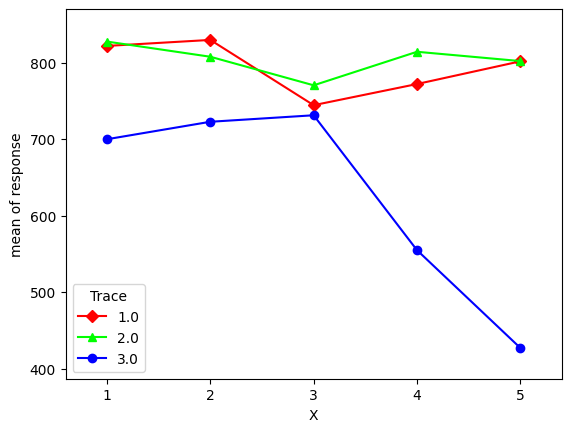

In [47]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(np.array(alloy_df['Dentist']),np.array(alloy_df['Method']),np.array(alloy_df['Response']),markers=['D','^','o']);